# Out-of-sample prediciton for Smillie et al.

In [3]:
# Setup
import numpy as np
import pandas as pd
import toytree as tt
from tasccoda import tree_utils as util
from tasccoda import tree_ana as ana
import anndata as ad
from sccoda.util import comp_ana as ana2
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.model_selection import KFold
import os

import importlib

In [17]:
# prepare datasets

data_path = '../../../tascCODA_data/applications/smillie_UC/SCP259/metadata/'
meta = pd.read_csv(data_path + 'meta_processed.csv')
meta["Cluster"] = [str.replace(x, " ", "") for x in meta["Cluster"]]
meta

vars = meta.groupby("Cluster").agg({
    "Major_l1": "first",
    "Major_l2": "first",
    "Major_l3": "first",
    "Major_l4": "first",
})

tree_levels = ["Major_l1", "Major_l2", "Major_l3", "Major_l4", "Cluster"]
newick = util.df2newick(meta.loc[:, tree_levels].reset_index(drop=True), tree_levels)

print(newick)
tree = tt.tree(newick=newick, tree_format=8)
tree.draw(tip_labels_align=True, node_sizes=10, node_labels='name')

counts = pd.crosstab(
    [meta["Sample"], meta["Subject"], meta["Location"], meta["Health"], meta["Replicate"]],
    meta["Cluster"])
obs = pd.DataFrame(index=counts.index).reset_index()
counts = counts.reset_index(drop=True)

data = ad.AnnData(X=counts, var=vars, obs=obs, uns={"newick": newick, "phylo_tree": tree})
data_epi = data[data.obs["Location"] == "Epi"]
data_lp = data[data.obs["Location"] == "LP"]
all_data = {"all": data, "epi": data_epi, "LP": data_lp}

data_epi_hn = data_epi[data_epi.obs["Health"].isin(["Healthy", "Non-inflamed"])]
data_epi_hi = data_epi[data_epi.obs["Health"].isin(["Healthy", "Inflamed"])]
data_epi_ni = data_epi[data_epi.obs["Health"].isin(["Non-inflamed", "Inflamed"])]

data_LP_hn = data_lp[data_lp.obs["Health"].isin(["Healthy", "Non-inflamed"])]
data_LP_hi = data_lp[data_lp.obs["Health"].isin(["Healthy", "Inflamed"])]
data_LP_ni = data_lp[data_lp.obs["Health"].isin(["Non-inflamed", "Inflamed"])]

datasets = {
    "epi_hn": data_epi_hn,
    "epi_hi": data_epi_hi,
    "epi_ni": data_epi_ni,
    "LP_hn": data_LP_hn,
    "LP_hi": data_LP_hi,
    "LP_ni": data_LP_ni,
}

(((((EnterocyteProgenitors,ImmatureEnterocytes2,ImmatureEnterocytes1)Immature cells,(TA1,TA2)TA cells,(Best4+Enterocytes,Enterocytes)Absorptive Mature cells)Absorptive,((CyclingTA)Cycling TA4)Cycling TA3,((ImmatureGoblet,SecretoryTA)Progenitor cells,(Enteroendocrine,Goblet,Tuft)Secretory Mature cells)Secretory,((Stem)Stem4)Stem3,((Mcells)M cells4)M cells3)Epithelial)Epithelial,((((CD8+IELs,CD8+LP,CyclingT,CD8+IL17+)CD8+ T,(CD4+Memory,CD4+ActivatedFos-lo,CD4+PD1+,CD4+ActivatedFos-hi,MT-hi,Tregs)CD4+ T)T cells,((CyclingB)Cycling B4,(GC)GC4,(Follicular)Follicular4,(Plasma)Plasma4)B cells,((NKs)NKs4)NKs3,((ILCs)ILCs4)ILCs3)Lymphoid,(((CD69+Mast)CD69+ Mast4,(CD69-Mast)CD69- Mast4)Mast,((Macrophages)Macrophages4,(DC2,DC1)DCs,(InflammatoryMonocytes)Inflammatory Monocytes4,(CyclingMonocytes)Cycling Monocytes4)Monocytes)Myeloid)Immune,((((WNT5B+2,WNT5B+1)WNT5B+,(WNT2B+Fos-hi,WNT2B+Fos-lo1,RSPO3+,WNT2B+Fos-lo2)WNT2B+,(InflammatoryFibroblasts)Inflammatory Fibroblast4,(Myofibroblasts)Myofibroblast

/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="365.0px" height="918.0px" viewBox="0 0 365.0 918.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t170bcae43523491f9cb8e1d87baaeed6"> CD4+T CD8+T Plasma4 Follicular4 GC4 CyclingB4 ILCs4 NKs4 DCs CyclingMonocytes4 InflammatoryMonocytes4 Macrophages4 CD69-Mast4 CD69+Mast4 Immaturecells AbsorptiveMaturecells TAcells SecretoryMaturecells Progenitorcells Mcells4 Stem4 CyclingTA4 WNT2B+ WNT5B+ Myofibroblast4 InflammatoryFibroblast4 EndothelialCells Glia4 Tcells Bcells ILCs3 NKs3 Monocytes Mast Absorptive Secretory Mcells3 Stem3 CyclingTA3 Fibroblasts Endothelial3 Glia3 Lymphoid Myeloid Epithelial Stromal Immune Epithelial Stromal Tregs MT-hi CD4+ActivatedFos-hi CD4+PD1+ CD4+ActivatedFos-lo CD4+Memory CD8+IL17+ CyclingT CD8+LP CD8+IELs Plasma Follicular GC CyclingB ILCs NKs DC1 DC2 CyclingMonocytes InflammatoryMonocytes Macrophages CD69-Mast CD69+Mast ImmatureEnterocytes1 ImmatureEnterocytes2 EnterocyteProgenitors Enterocytes Best4+Enterocytes TA2 TA1 Tuft Goblet Enteroendocrine SecretoryTA ImmatureGoblet Mcells Stem CyclingTA WNT2B+Fos-lo2 RSPO3+ WNT2B+Fos-lo1 WNT2B+Fos-hi WNT5B+1 WNT5B+2 Myofibroblasts InflammatoryFibroblasts Post-capillaryVenules Endothelial Microvascular Pericytes Glia

In [18]:
# read scCODA and Dirihclet regression data
results_dr = {}
for name in os.listdir("../../../tascCODA_data/applications/smillie_UC/results_dr"):
    results_dr[name] = pd.read_csv("../../../tascCODA_data/applications/smillie_UC/results_dr" + f"/{name}")

results_sccoda = {}
for name in os.listdir("../../../tascCODA_data/applications/smillie_UC/results_sccoda"):
    results_sccoda[name] = pd.read_csv("../../../tascCODA_data/applications/smillie_UC/results_sccoda" + f"/{name}")

Split each dataset into 5 folds (seeded)

In [19]:
n_folds = 5
fold_data = {}

for name, data in datasets.items():
    kf = KFold(n_splits=n_folds, random_state=1234, shuffle=True)
    c = 0
    for train_index, test_index in kf.split(data.X):

        fold_data[(name, c)] = (data[train_index].copy(), data[test_index].copy())
        c += 1

print(fold_data[("LP_ni", 2)])

(AnnData object with n_obs × n_vars = 38 × 51
    obs: 'Sample', 'Subject', 'Location', 'Health', 'Replicate'
    var: 'Major_l1', 'Major_l2', 'Major_l3', 'Major_l4'
    uns: 'newick', 'phylo_tree', AnnData object with n_obs × n_vars = 10 × 51
    obs: 'Sample', 'Subject', 'Location', 'Health', 'Replicate'
    var: 'Major_l1', 'Major_l2', 'Major_l3', 'Major_l4'
    uns: 'newick', 'phylo_tree')


Run scCODA

In [48]:
for name in datasets.keys():
    print(name)
    res_sccoda = {}

    file_name = f"oos_sccoda_{name}_n_20000.pkl"

    for split in range(n_folds):
        train_data, test_data = fold_data[(name, split)]

        sccoda_mod = ana2.CompositionalAnalysis(train_data.copy(), "Health", "automatic")
        sccoda_res = sccoda_mod.sample_hmc(num_results=20000, num_burnin=5000)
        res_sccoda[split] = (sccoda_res.intercept_df, sccoda_res.effect_df)

    with open(f"../../../tascCODA_data/applications/smillie_UC/out_of_sample/{file_name}", "wb") as f:
        pkl.dump(res_sccoda, f)

epi_ni
Automatic reference selection! Reference cell type set to ImmatureGoblet
Zero counts encountered in data! Added a pseudocount of 0.5.


/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/comp_ana.py:89: RuntimeWarning: invalid value encountered in true_divide
  cell_type_disp = np.var(rel_abun, axis=0)/np.mean(rel_abun, axis=0)
100%|██████████| 20000/20000 [02:01<00:00, 164.03it/s]


MCMC sampling finished. (159.331 sec)
Acceptance rate: 51.3%


/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/comp_ana.py:89: RuntimeWarning: invalid value encountered in true_divide
  cell_type_disp = np.var(rel_abun, axis=0)/np.mean(rel_abun, axis=0)


Automatic reference selection! Reference cell type set to ImmatureGoblet
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:00<00:00, 166.39it/s]


MCMC sampling finished. (157.305 sec)
Acceptance rate: 64.3%


/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/comp_ana.py:89: RuntimeWarning: invalid value encountered in true_divide
  cell_type_disp = np.var(rel_abun, axis=0)/np.mean(rel_abun, axis=0)


Automatic reference selection! Reference cell type set to ImmatureGoblet
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:04<00:00, 160.14it/s]


MCMC sampling finished. (161.385 sec)
Acceptance rate: 45.4%


/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/comp_ana.py:89: RuntimeWarning: invalid value encountered in true_divide
  cell_type_disp = np.var(rel_abun, axis=0)/np.mean(rel_abun, axis=0)


Automatic reference selection! Reference cell type set to ImmatureGoblet
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:01<00:00, 164.31it/s]


MCMC sampling finished. (164.869 sec)
Acceptance rate: 64.9%


/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/comp_ana.py:89: RuntimeWarning: invalid value encountered in true_divide
  cell_type_disp = np.var(rel_abun, axis=0)/np.mean(rel_abun, axis=0)


Automatic reference selection! Reference cell type set to ImmatureGoblet
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:13<00:00, 149.96it/s]


MCMC sampling finished. (171.121 sec)
Acceptance rate: 42.1%


/Users/johannes.ostner/Documents/PhD/scCODA/scCODA/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/Users/johannes.ostner/opt/anaconda3/envs/scCODA_3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Run tascCODA

In [20]:
phis = [-5, -1, 0, 1, 5]

In [ ]:
for p in phis:
    for name in datasets.keys():
        print(name)
        res_tree = {}

        file_name = f"oos_tasccoda_{name}_phi_{p}_n_20000.pkl"

        for split in range(n_folds):
            train_data, test_data = fold_data[(name, split)]

            tree_mod= ana.CompositionalAnalysisTree(
                train_data.copy().copy(),
                reference_cell_type="automatic",
                formula="Health",
                reg="scaled_3",
                pen_args={"lambda_0": 50, "phi": p, "lambda_1": 5},
                model="new"
            )

            tree_res = tree_mod.sample_hmc_da(num_results=20000, num_burnin=int(20000/4))

            res_tree[split] = (tree_res.intercept_df, tree_res.effect_df, tree_res.node_df)

        with open(f"../../../tascCODA_data/applications/smillie_UC/out_of_sample/{file_name}", "wb") as f:
            pkl.dump(res_tree, f)

Out-of-sample prediction for scCODA

In [21]:
# Out-of-sample predictions for scCODA
post_control_samples = pd.DataFrame(columns=["Cell type", "dataset", "phi", "model", "count", "type"])
post_case_samples = pd.DataFrame(columns=["Cell type", "dataset", "phi", "model", "count", "type"])
post_effects = pd.DataFrame(columns=["Cell type", "dataset", "phi", "model", "effect"])

mlses = []
ps = []
names = []
models = []
splits = []
num_effects = []

for name in datasets.keys():
    print(name)

    file_name = f"../../../tascCODA_data/applications/smillie_UC/out_of_sample/oos_sccoda_{name}_n_20000.pkl"
    with open(file_name, "rb") as f:
        results_sccoda = pkl.load(f)

    if name in ["epi_hn", "LP_hn"]:
        a = "Healthy"
        b = "Non-inflamed"
    elif name in ["epi_hi", "LP_hi"]:
        a = "Healthy"
        b = "Inflamed"
    if name in ["epi_ni", "LP_ni"]:
        a = "Non-inflamed"
        b = "Inflamed"

    cell_types = datasets[name].var.index

    for split in range(n_folds):

        post_mean_control_sccoda = np.array([results_sccoda[split][0].loc[i, "Expected Sample"] for i in cell_types])
        edf_sccoda = results_sccoda[split][1].copy()
        edf_sccoda.index = edf_sccoda.index.droplevel(0)
        post_mean_case_sccoda = np.array([edf_sccoda.loc[i, "Expected Sample"] for i in cell_types])
        pms = np.array([
            post_mean_control_sccoda if h == a else post_mean_case_sccoda if h == b else [] for h in datasets[name].obs["Health"]
        ])

        lse_sccoda = np.sum((np.log(datasets[name].X+1) - np.log(pms+1))**2, axis=1)
        mlse_sccoda = np.mean(lse_sccoda).tolist()

        num_effects_sccoda = len(edf_sccoda[edf_sccoda["Final Parameter"] != 0])
        num_effects.append(num_effects_sccoda)

        mlses.append(mlse_sccoda)
        ps.append(0)
        names.append(name)
        models.append("scCODA")
        splits.append(split)

        mean_sample_control = np.mean(datasets[name].X[datasets[name].obs["Health"] == a, :], axis=0)
        mean_sample_case = np.mean(datasets[name].X[datasets[name].obs["Health"] == b, :], axis=0)

        post_control_samples = post_control_samples.append(pd.DataFrame({
            "Cell type": cell_types,
            "dataset": name,
            "phi": 0,
            "model": "scCODA",
            "count": post_mean_control_sccoda,
            "type": "control",
            "split": split
        }))
        post_control_samples = post_control_samples.append(pd.DataFrame({
            "Cell type": cell_types,
            "dataset": name,
            "phi": 0,
            "model": "data",
            "count": mean_sample_control,
            "type": "control",
            "split": split

        }))

        post_case_samples = post_case_samples.append(pd.DataFrame({
            "Cell type": cell_types,
            "dataset": name,
            "phi": 0,
            "model": "scCODA",
            "count": post_mean_case_sccoda,
            "type": "case",
            "split": split
            }))
        post_case_samples = post_case_samples.append(pd.DataFrame({
            "Cell type": cell_types,
            "dataset": name,
            "phi": 0,
            "model": "data",
            "count": mean_sample_case,
            "type": "case",
            "split": split
        }))

        post_effects = post_effects.append(pd.DataFrame({
            "Cell type": cell_types,
            "dataset": name,
            "phi": 0,
            "model": "scCODA",
            "effect": np.array([edf_sccoda.loc[i, "Final Parameter"] for i in cell_types]),
            "split": split
        }))


mse_df = pd.DataFrame({"phi": ps, "name": names, "mlse": mlses, "model": models, "split":splits, "num_effects": num_effects})

epi_hn
epi_hi
epi_ni
LP_hn
LP_hi
LP_ni


Out-of-sample prediction for tascCODA


In [22]:
# same for tascCODA

mlses = []
ps = []
names = []
models = []
splits = []
num_effects = []

for p in phis:
    print(p)

    for name in datasets.keys():
        print(name)

        file_name = f"../../../tascCODA_data/applications/smillie_UC/out_of_sample/oos_tasccoda_{name}_phi_{p}_n_20000.pkl"
        with open(file_name, "rb") as f:
            results_tasccoda = pkl.load(f)

        if name in ["epi_hn", "LP_hn"]:
            a = "Healthy"
            b = "Non-inflamed"
        elif name in ["epi_hi", "LP_hi"]:
            a = "Healthy"
            b = "Inflamed"
        if name in ["epi_ni", "LP_ni"]:
            a = "Non-inflamed"
            b = "Inflamed"

        cell_types = datasets[name].var.index

        for split in range(n_folds):

            post_mean_control_tasccoda = np.array([results_tasccoda[split][0].loc[i, "Expected Sample"] for i in cell_types])
            edf_tasccoda = results_tasccoda[split][1].copy()
            edf_tasccoda.index = edf_tasccoda.index.droplevel(0)
            post_mean_case_tasccoda = np.array([edf_tasccoda.loc[i, "Expected Sample"] for i in cell_types])
            pms = np.array([
                post_mean_control_tasccoda if h == a else post_mean_case_tasccoda if h == b else [] for h in datasets[name].obs["Health"]
            ])

            lse_tasccoda = np.sum((np.log(datasets[name].X+1) - np.log(pms+1))**2, axis=1)
            mlse_tasccoda = np.mean(lse_tasccoda).tolist()

            mlses.append(mlse_tasccoda)
            ps.append(p)
            names.append(name)
            models.append("tascCODA")
            splits.append(split)

            mean_sample_control = np.mean(datasets[name].X[datasets[name].obs["Health"] == a, :], axis=0)
            mean_sample_case = np.mean(datasets[name].X[datasets[name].obs["Health"] == b, :], axis=0)

            num_effects_tasccoda = len(results_tasccoda[split][2][results_tasccoda[split][2]["Final Parameter"] != 0])
            num_effects.append(num_effects_tasccoda)

            post_control_samples = post_control_samples.append(pd.DataFrame({
                "Cell type": cell_types,
                "dataset": name,
                "phi": p,
                "model": "tascCODA",
                "count": post_mean_control_tasccoda,
                "type": "control",
                "split": split
            }))

            post_case_samples = post_case_samples.append(pd.DataFrame({
                "Cell type": cell_types,
                "dataset": name,
                "phi": p,
                "model": "tascCODA",
                "count": post_mean_case_tasccoda,
                "type": "case",
                "split": split
                }))

            post_effects = post_effects.append(pd.DataFrame({
                "Cell type": cell_types,
                "dataset": name,
                "phi": p,
                "model": "tascCODA",
                "effect": np.array([edf_tasccoda.loc[i, "Effect"] for i in cell_types]),
                "split": split
            }))


mse_df_ = pd.DataFrame({"phi": ps, "name": names, "mlse": mlses, "model": models, "split":splits, "num_effects": num_effects})
mse_df = pd.concat([mse_df, mse_df_])

-5
epi_hn
epi_hi
epi_ni
LP_hn
LP_hi
LP_ni
-1
epi_hn
epi_hi
epi_ni
LP_hn
LP_hi
LP_ni
0
epi_hn
epi_hi
epi_ni
LP_hn
LP_hi
LP_ni
1
epi_hn
epi_hi
epi_ni
LP_hn
LP_hi
LP_ni
5
epi_hn
epi_hi
epi_ni
LP_hn
LP_hi
LP_ni


In [23]:
mse_df

,phi,name,mlse,model,split,num_effects
0,0,epi_hn,125.998490,scCODA,0,4
1,0,epi_hn,134.507272,scCODA,1,1
2,0,epi_hn,133.667067,scCODA,2,2
3,0,epi_hn,134.148217,scCODA,3,3
4,0,epi_hn,146.468290,scCODA,4,2
...,...,...,...,...,...,...
145,5,LP_ni,225.071064,tascCODA,0,1
146,5,LP_ni,209.827258,tascCODA,1,1
147,5,LP_ni,233.402986,tascCODA,2,1
148,5,LP_ni,203.706893,tascCODA,3,3


Plots and table for paper

In [24]:
mse_df["group"] = mse_df["model"] + mse_df["phi"].astype(str)

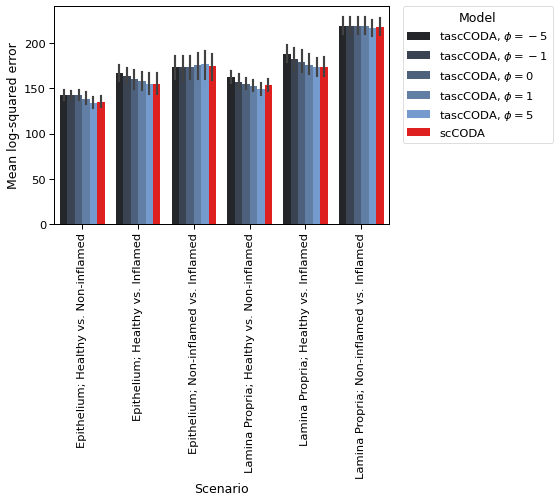

In [25]:
sns.set_context("paper", font_scale=1.3)
g = sns.barplot(
    data=mse_df,
    x="name",
    y="mlse",
    hue="group",
    hue_order=["tascCODA-5", "tascCODA-1", "tascCODA0", "tascCODA1", "tascCODA5", "scCODA0"],
    palette=sns.dark_palette("#69d", n_colors=5) + ["red"]
)

titles = {
            "epi_hn": "Epithelium; Healthy vs. Non-inflamed",
            "epi_hi": "Epithelium; Healthy vs. Inflamed",
            "epi_ni": "Epithelium; Non-inflamed vs. Inflamed",
            "LP_hn": "Lamina Propria; Healthy vs. Non-inflamed",
            "LP_hi": "Lamina Propria; Healthy vs. Inflamed",
            "LP_ni": "Lamina Propria; Non-inflamed vs. Inflamed",
        }

h, l = g.get_legend_handles_labels()
labels = [r"tascCODA, $\phi=-5$", r"tascCODA, $\phi=-1$", r"tascCODA, $\phi=0$", r"tascCODA, $\phi=1$", r"tascCODA, $\phi=5$", "scCODA"]
plt.legend(
    h,
    labels,
    bbox_to_anchor=(1.04, 1),
    loc=2,
    borderaxespad=0.,
    title="Model"
)
plt.ylabel("Mean log-squared error")
plt.xlabel("Scenario")
plt.xticks(
    ticks=np.arange(6),
    labels = [titles[x.get_text()] for x in g.get_xticklabels()],
    rotation=90
)

# plt.savefig("./plots_smillie/oos_bars_smillie.svg", bbox_inches="tight", format="svg")
plt.show()

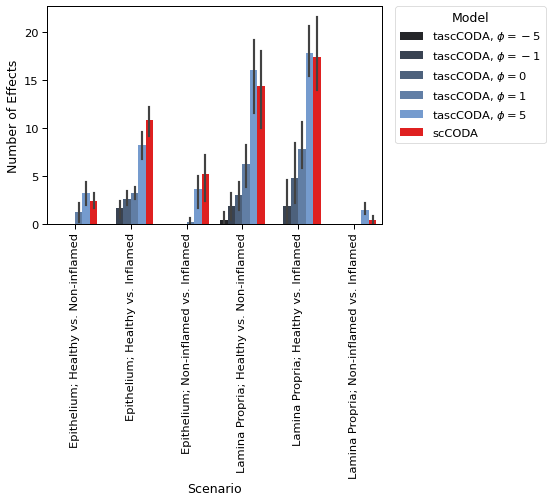

In [26]:
sns.set_context("paper", font_scale=1.3)
g = sns.barplot(
    data=mse_df,
    x="name",
    y="num_effects",
    hue="group",
    hue_order=["tascCODA-5", "tascCODA-1", "tascCODA0", "tascCODA1", "tascCODA5", "scCODA0"],
    palette=sns.dark_palette("#69d", n_colors=5) + ["red"]
)

titles = {
            "epi_hn": "Epithelium; Healthy vs. Non-inflamed",
            "epi_hi": "Epithelium; Healthy vs. Inflamed",
            "epi_ni": "Epithelium; Non-inflamed vs. Inflamed",
            "LP_hn": "Lamina Propria; Healthy vs. Non-inflamed",
            "LP_hi": "Lamina Propria; Healthy vs. Inflamed",
            "LP_ni": "Lamina Propria; Non-inflamed vs. Inflamed",
        }

h, l = g.get_legend_handles_labels()
labels = [r"tascCODA, $\phi=-5$", r"tascCODA, $\phi=-1$", r"tascCODA, $\phi=0$", r"tascCODA, $\phi=1$", r"tascCODA, $\phi=5$", "scCODA"]
plt.legend(
    h,
    labels,
    bbox_to_anchor=(1.04, 1),
    loc=2,
    borderaxespad=0.,
    title="Model"
)
plt.ylabel("Number of Effects")
plt.xlabel("Scenario")
plt.xticks(
    ticks=np.arange(6),
    labels = [titles[x.get_text()] for x in g.get_xticklabels()],
    rotation=90
)

# plt.savefig("./plots_smillie/oos_bars_smillie.svg", bbox_inches="tight", format="svg")
plt.show()


In [27]:
mse_df = mse_df.rename(columns={
    "name": "Scenario",
    "num_effects": "Effects",
    "phi": r"$\phi$",
    "model": "Model"
})
mse_df["MLSE"] = np.round(mse_df["mlse"], 1)
mse_avg = mse_df.groupby(["Scenario", "Model", r"$\phi$"]).agg({"MLSE": "mean", "Effects": "mean"}).unstack(level=0)
print(mse_avg.columns)
mse_avg.columns = mse_avg.columns.swaplevel(1,0)
mse_avg.sort_index(level=0, axis=1, inplace=True)
mse_avg = mse_avg[[("epi_hn", "MLSE"), ("epi_hn", "Effects"),
                   ("epi_hi", "MLSE"), ("epi_hi", "Effects"),
                   ("epi_ni", "MLSE"), ("epi_ni", "Effects"),
                   ("LP_hn", "MLSE"), ("LP_hn", "Effects"),
                   ("LP_hi", "MLSE"), ("LP_hi", "Effects"),
                   ("LP_ni", "MLSE"), ("LP_ni", "Effects")]]
print(mse_avg.columns)

mse_avg

MultiIndex([(   'MLSE',  'LP_hi'),
            (   'MLSE',  'LP_hn'),
            (   'MLSE',  'LP_ni'),
            (   'MLSE', 'epi_hi'),
            (   'MLSE', 'epi_hn'),
            (   'MLSE', 'epi_ni'),
            ('Effects',  'LP_hi'),
            ('Effects',  'LP_hn'),
            ('Effects',  'LP_ni'),
            ('Effects', 'epi_hi'),
            ('Effects', 'epi_hn'),
            ('Effects', 'epi_ni')],
           names=[None, 'Scenario'])
MultiIndex([('epi_hn',    'MLSE'),
            ('epi_hn', 'Effects'),
            ('epi_hi',    'MLSE'),
            ('epi_hi', 'Effects'),
            ('epi_ni',    'MLSE'),
            ('epi_ni', 'Effects'),
            ( 'LP_hn',    'MLSE'),
            ( 'LP_hn', 'Effects'),
            ( 'LP_hi',    'MLSE'),
            ( 'LP_hi', 'Effects'),
            ( 'LP_ni',    'MLSE'),
            ( 'LP_ni', 'Effects')],
           names=['Scenario', None])


Scenario         epi_hn          epi_hi          epi_ni           LP_hn  \
                   MLSE Effects    MLSE Effects    MLSE Effects    MLSE   
Model    $\phi$                                                           
scCODA    0      134.96     2.4  154.44    10.8  174.78     5.2  154.02   
tascCODA -5      142.22     0.0  167.46     0.0  173.94     0.0  162.76   
         -1      142.16     0.0  163.60     1.6  174.10     0.0  157.62   
          0      142.18     0.0  160.68     2.6  174.10     0.0  155.16   
          1      138.56     1.2  158.06     3.2  175.86     0.2  152.80   
          5      134.36     3.2  154.64     8.2  177.26     3.6  149.58   

Scenario                  LP_hi           LP_ni          
                Effects    MLSE Effects    MLSE Effects  
Model    $\phi$                                          
scCODA    0        14.4  173.40    17.4  218.62     0.4  
tascCODA -5         0.4  188.58     0.0  219.72     0.0  
         -1         1.8  182.96     1.8  219.70     0.0  
          0         3.0  178.88     4.8  219.66     0.0  
          1         6.2  176.02     7.8  219.68     0.0  
          5        16.0  173.32    17.8  216.76     1.4

In [28]:
print(mse_avg.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
         & Scenario & \multicolumn{2}{l}{epi\_hn} & \multicolumn{2}{l}{epi\_hi} & \multicolumn{2}{l}{epi\_ni} & \multicolumn{2}{l}{LP\_hn} & \multicolumn{2}{l}{LP\_hi} & \multicolumn{2}{l}{LP\_ni} \\
         & {} &    MLSE & Effects &    MLSE & Effects &    MLSE & Effects &    MLSE & Effects &    MLSE & Effects &    MLSE & Effects \\
Model & \$\textbackslash phi\$ &         &         &         &         &         &         &         &         &         &         &         &         \\
\midrule
scCODA &  0 &  134.96 &     2.4 &  154.44 &    10.8 &  174.78 &     5.2 &  154.02 &    14.4 &  173.40 &    17.4 &  218.62 &     0.4 \\
tascCODA & -5 &  142.22 &     0.0 &  167.46 &     0.0 &  173.94 &     0.0 &  162.76 &     0.4 &  188.58 &     0.0 &  219.72 &     0.0 \\
         & -1 &  142.16 &     0.0 &  163.60 &     1.6 &  174.10 &     0.0 &  157.62 &     1.8 &  182.96 &     1.8 &  219.70 &     0.0 \\
         &  0 &  142.18 &     0.0 &  160.68 &     

In [29]:
mse_avg = mse_df.groupby(["Scenario", "Model", r"$\phi$"]).agg({"MLSE": "mean", "Effects": "mean"}).unstack([1,2]).stack(0)
mse_avg= mse_avg.loc[[
    ("epi_hn", "MLSE"), ("epi_hn", "Effects"),
    ("epi_hi", "MLSE"), ("epi_hi", "Effects"),
    ("epi_ni", "MLSE"), ("epi_ni", "Effects"),
    ("LP_hn", "MLSE"), ("LP_hn", "Effects"),
    ("LP_hi", "MLSE"), ("LP_hi", "Effects"),
    ("LP_ni", "MLSE"), ("LP_ni", "Effects")
], [
    ("tascCODA", -5), ("tascCODA", -1), ("tascCODA", 0), ("tascCODA", 1), ("tascCODA", 5), ("scCODA", 0)
]]
mse_avg

Model            tascCODA                                  scCODA
$\phi$                 -5      -1       0       1       5       0
Scenario                                                         
epi_hn   MLSE      142.22  142.16  142.18  138.56  134.36  134.96
         Effects     0.00    0.00    0.00    1.20    3.20    2.40
epi_hi   MLSE      167.46  163.60  160.68  158.06  154.64  154.44
         Effects     0.00    1.60    2.60    3.20    8.20   10.80
epi_ni   MLSE      173.94  174.10  174.10  175.86  177.26  174.78
         Effects     0.00    0.00    0.00    0.20    3.60    5.20
LP_hn    MLSE      162.76  157.62  155.16  152.80  149.58  154.02
         Effects     0.40    1.80    3.00    6.20   16.00   14.40
LP_hi    MLSE      188.58  182.96  178.88  176.02  173.32  173.40
         Effects     0.00    1.80    4.80    7.80   17.80   17.40
LP_ni    MLSE      219.72  219.70  219.66  219.68  216.76  218.62
         Effects     0.00    0.00    0.00    0.00    1.40    0.40

In [30]:
print(mse_avg.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
      & Model & \multicolumn{5}{l}{tascCODA} &  scCODA \\
      & \$\textbackslash phi\$ &       -5 &      -1 &       0 &       1 &       5 &       0 \\
Scenario & {} &          &         &         &         &         &         \\
\midrule
epi\_hn & MLSE &   142.22 &  142.16 &  142.18 &  138.56 &  134.36 &  134.96 \\
      & Effects &     0.00 &    0.00 &    0.00 &    1.20 &    3.20 &    2.40 \\
epi\_hi & MLSE &   167.46 &  163.60 &  160.68 &  158.06 &  154.64 &  154.44 \\
      & Effects &     0.00 &    1.60 &    2.60 &    3.20 &    8.20 &   10.80 \\
epi\_ni & MLSE &   173.94 &  174.10 &  174.10 &  175.86 &  177.26 &  174.78 \\
      & Effects &     0.00 &    0.00 &    0.00 &    0.20 &    3.60 &    5.20 \\
LP\_hn & MLSE &   162.76 &  157.62 &  155.16 &  152.80 &  149.58 &  154.02 \\
      & Effects &     0.40 &    1.80 &    3.00 &    6.20 &   16.00 &   14.40 \\
LP\_hi & MLSE &   188.58 &  182.96 &  178.88 &  176.02 &  173.32 &  173.40 \\
      & Effe